In [2]:
# 군집 정닶없이, 데이터 분서해서 그룹화
from sklearn import datasets
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
import pandas as pd
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
labels.head()
data['labels'] = labels['labels']

In [7]:
labels['labels'].unique()


array([0, 1, 2])

In [8]:
labels['labels'].value_counts()

2    50
1    50
0    50
Name: labels, dtype: int64

In [10]:
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width','Petal length','Petal width']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
feature = data[['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
mo = KMeans(n_clusters=3, algorithm = 'auto')
mo.fit(feature)
predict = pd.DataFrame(mo.predict(feature))
predict.columns = ['predict']
r = pd.concat([feature, predict], axis = 1)
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   predict       150 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.1 KB


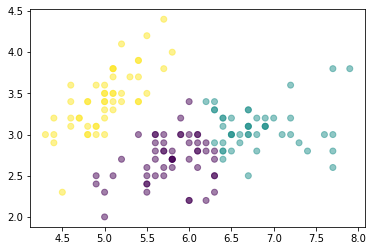

In [17]:
# 예측 데이터 그래프
plt.scatter(r['Sepal length'], r['Sepal width'], c = r['predict'], alpha=0.5)

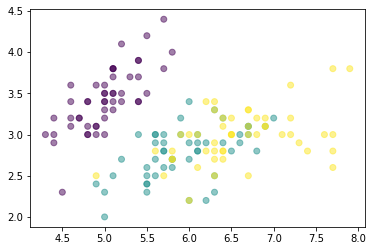

In [27]:
# 실제 데이터 그래프
plt.scatter(data['Sepal length'], data['Sepal width'], c =data['labels'], alpha=0.5)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(data['labels'].values, r['predict'].values))
print(confusion_matrix(data['labels'].values, r['predict'].values))

0.08
[[ 0  0 50]
 [38 12  0]
 [15 35  0]]
